In [1]:
from keras.datasets import boston_housing

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
from sklearn.linear_model import Ridge

In [4]:
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(x_train,y_train)

Ridge()

In [5]:
y_pred = ridge_model.predict(x_test)

In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Ridge Regression):", mse)

Mean Squared Error (Ridge Regression): 22.548158689769696


In [9]:
# K-Means:


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(x_train)
centroids = kmeans.cluster_centers_

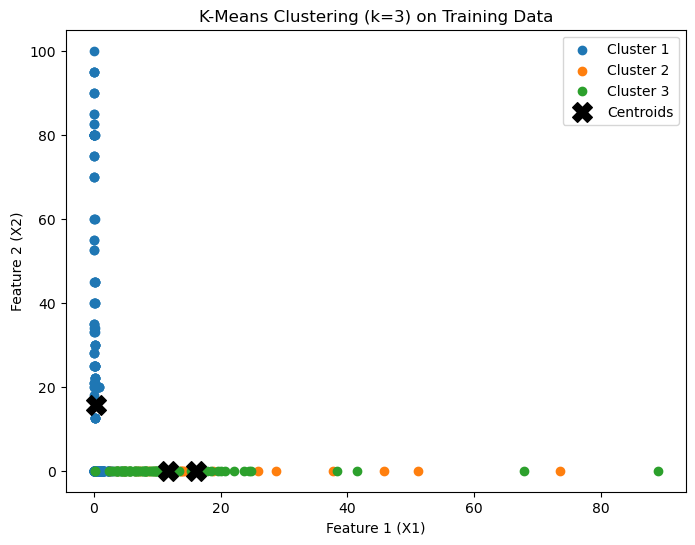

In [10]:
plt.figure(figsize=(8, 6))
for cluster in np.unique(clusters):
    cluster_points = x_train[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster+1}")
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

# Add labels and title
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.title("K-Means Clustering (k=3) on Training Data")
plt.legend()
plt.show()

In [11]:

test_clusters = kmeans.predict(x_test)

In [12]:
models = {}
cluster_mse = []

In [15]:
models = {}
cluster_mse = []
for cluster in range(3):
    # Select data points belonging to the current cluster
    cluster_indices = (clusters == cluster)
    x_cluster_train = x_train[cluster_indices]
    y_cluster_train = y_train[cluster_indices]
    
    # Train ridge regression for the current cluster
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(x_cluster_train, y_cluster_train)
    models[cluster] = ridge_model
    
    # Predict on test data points belonging to the same cluster
    test_cluster_indices = (test_clusters == cluster)
    x_cluster_test = x_test[test_cluster_indices]
    y_cluster_test = y_test[test_cluster_indices]
    y_pred = ridge_model.predict(x_cluster_test)
    
    # Calculate MSE for the current cluster
    mse = mean_squared_error(y_cluster_test, y_pred)
    cluster_mse.append(mse)

# Calculate total MSE as the average of individual cluster MSEs
total_mse = np.mean(cluster_mse)
total_mse

np.float64(23.666487145829517)

In [ ]:
# MSE a little bigger? 